# Вариант 1. Кайгордов. М19-117. 20.04.2020

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.stats

# Задача 1:

Анализ напряжений, возникающих в элементе, выполнялся в имитированных условиях эксплуатации, и были получены следующие восемь результатов: 
    
    150; 205; 225; 235; 250; 265; 285; 305 МПа. 

Прочность элемента необходимо оценить на основе следующих 10 результатов: 

    180; 245; 280; 305; 315; 330; 335; 355; 404; 485 МПа. 

С помощью этих данных вычислите вероятность безотказной работы элемента.

In [2]:
sig = np.array([150, 205, 225, 235, 250, 265, 285, 305])
x_sig = np.linspace(0, 1, len(sig))
R   = np.array([180, 245, 280, 305, 315, 330, 335, 355, 404, 485])
x_R = np.linspace(0, 1, len(R))

[140. 155. 170. 185. 200. 215. 230. 245. 260. 275. 290. 305. 320. 335.
 350. 365. 380. 395. 410. 425. 440. 455. 470. 485. 500.]


Text(0, 0.5, 'F_sig \n\n F_R')

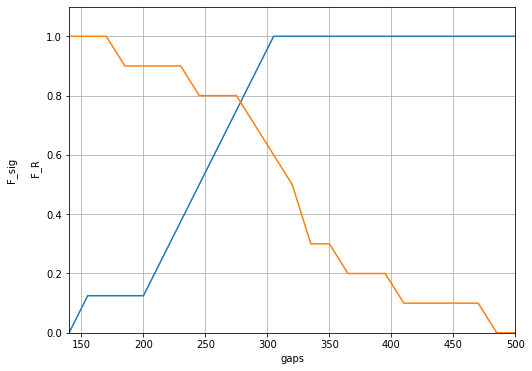

In [3]:
gaps = np.linspace(140, 500, 25)
print(gaps)

def proba(gaps, value):
    F = []
    counter = 0
    for i in range(len(gaps)):
        for j in range(len(value)):
            if value[j] <= gaps[i]: counter += 1
            else: break
        F.append(counter / len(value))
        counter = 0
    #print(F)
    return F

F_sig = proba(gaps, sig)
F_R   = [1- prob for prob in proba(gaps, R)]


plt.figure(figsize=(8,6))
plt.grid()
plt.xlim(140, 500+0.1)
plt.ylim(0, 1+0.1)
plt.plot(gaps, F_sig)
plt.plot(gaps, F_R)
plt.xlabel('gaps')
plt.ylabel('F_sig \n\n F_R')

Area under curve:
P = 0.83125


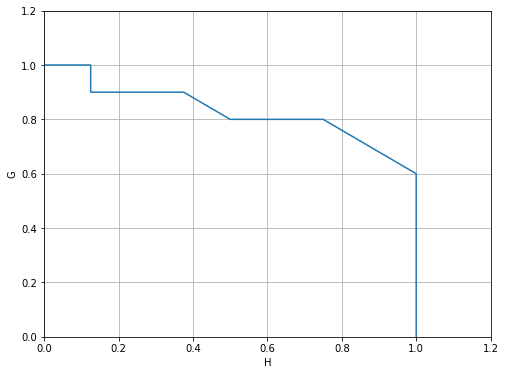

In [4]:
plt.figure(figsize=(8,6))
plt.xlim(0, 1.2)
plt.ylim(0, 1.2)
plt.grid()
plt.plot()
plt.plot(F_sig, F_R)
plt.xlabel('H')
plt.ylabel('G')

print('Area under curve:')
print(f'P = {np.trapz(F_R, x=F_sig)}')

# Ответ: 0.83125

# Задача 2:

Напряжение имеет нормальное распределение с математическим ожиданием 600 МПа и средним квадратичным отклонением 110 МПа.

Прочность имеет нормальное распределение с математическим ожиданием 800 МПа и средним квадратичным отклонением 150 МПа.

Вычислите вероятность безотказной работы.

In [6]:
m_sig, s_sig = 600, 110
m_R, s_R = 800, 150

m_z = m_R - m_sig
print(f'm_z = {m_z}')

s_z = math.sqrt(s_R**2 + s_sig**2)
print(f's_z = {round(s_z, 3)}')

u = - m_z/s_z
print(f'Quantile u = {round(u,3)}')

G = scipy.stats.norm.cdf(abs(u))
print(f'Prob. P = {round(G,3)}')

m_z = 200
s_z = 186.011
Quantile u = -1.075
Prob. P = 0.859


# Ответ: 0.859